<a href="https://colab.research.google.com/github/lkivumbi/WK10-workflow-pracitce/blob/main/Foodhub_Project_Full_Code_Luke_Kivumbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
df = pd.read_csv("/content/drive/MyDrive/AIML TEXAS MCOMBS/foodhub_order.csv")

In [5]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
df.shape

(1898, 9)

#### Observations: `There are 1898 rows and 9 columns in the data`


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: `there's 4 columns with interger data type, 4 columns with string or object datatype and 1 column with a float datatype.`


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: `there're no missing values in the data set`


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [10]:
#looking at description of object datatype
df.describe(include='object').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations: `on average it takes about 27.4 minutes for food to be prepared. The minimum amount of time taken to prepared food after an order is placed is 20 minutes while the maximum time is 35 minutes.`


### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
# Write the code here
df['rating'].value_counts()

,rating
Not given,736
5,588
4,386
3,188


#### Observations: `736 orders were not rated.`


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

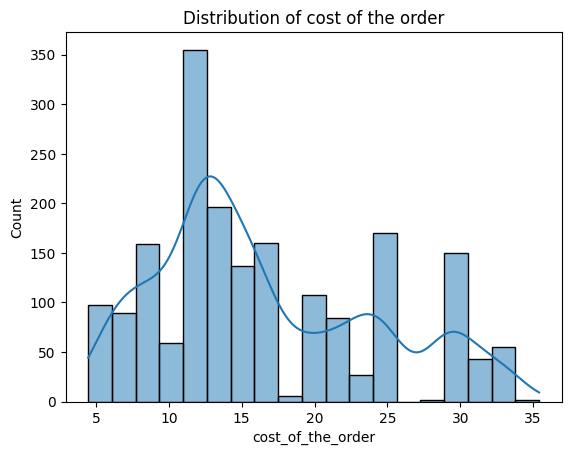

In [21]:
# Write the code here
sns.histplot(df['cost_of_the_order'], kde=True);
plt.title('Distribution of cost of the order');
plt.savefig("output.jpg", bbox_inches='tight');

#####Observations `Most orders cost between 11.5 to 12.5 dollars.`

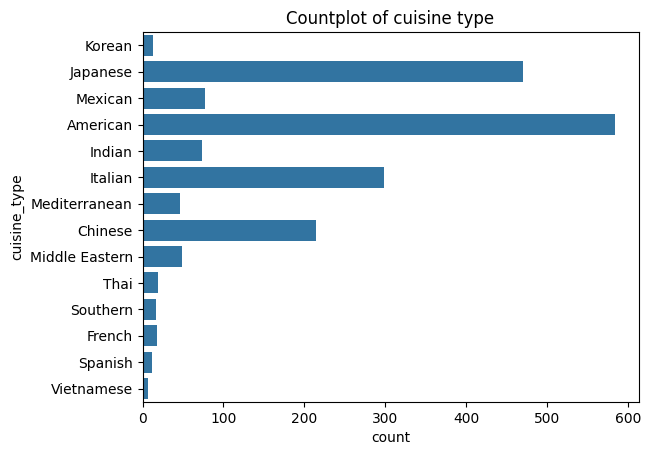

In [11]:
#barplot of cusisine type
sns.countplot(df['cuisine_type']);
plt.title('Countplot of cuisine type');
plt.savefig("output.jpg", bbox_inches='tight');

#####Observations `American cuisine followed by Japanese and then Italian top the list of cuisines.`

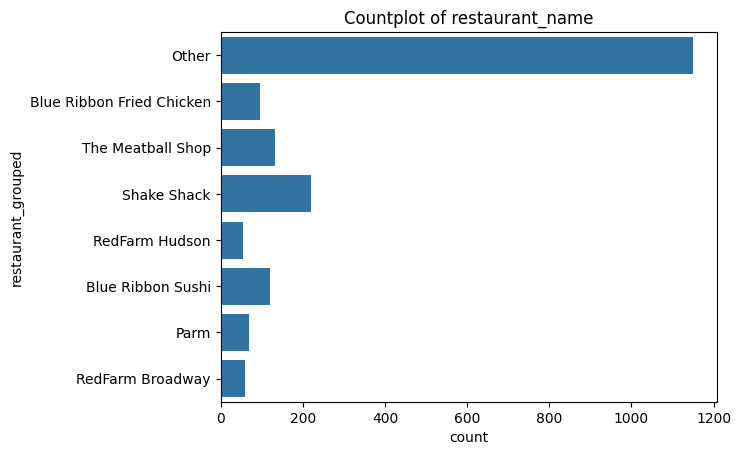

In [22]:
#countplot of restaurant
threshold = 50
df['restaurant_grouped'] = df['restaurant_name'].apply(lambda x: x if df['restaurant_name'].value_counts()[x] > threshold else 'Other') #AI generated code
sns.countplot(df['restaurant_grouped']);
plt.title('Countplot of restaurant_name');
plt.savefig("output.jpg", bbox_inches='tight');

####Observations `The shake Shack tops restaurants with the most orders.`

In [23]:
#checking value counts of customer id
df['customer_id'].value_counts()

,customer_id
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
385426,1
254913,1
289597,1
74412,1


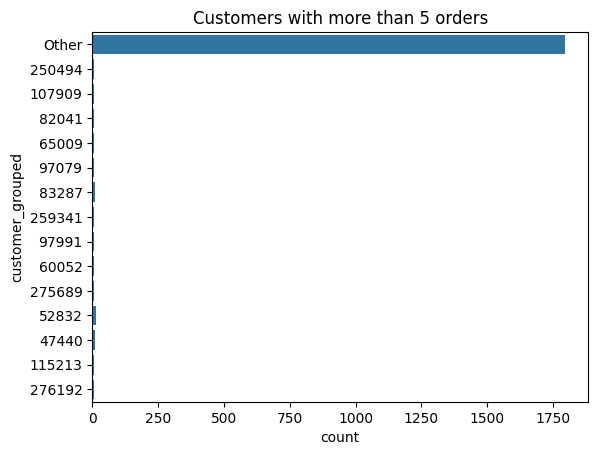

In [25]:
#countplot of Customer id
thresh = 5
df['customer_grouped'] = df['customer_id'].apply(lambda x: x if df['customer_id'].value_counts()[x] > thresh else 'Other') #AI generated code
sns.countplot(df['customer_grouped']);
plt.title('Customers with more than 5 orders');
plt.savefig("output.jpg", bbox_inches='tight');

####Observations `The customers in the graph above are the repeat customers that should considered for offers and promotions.`

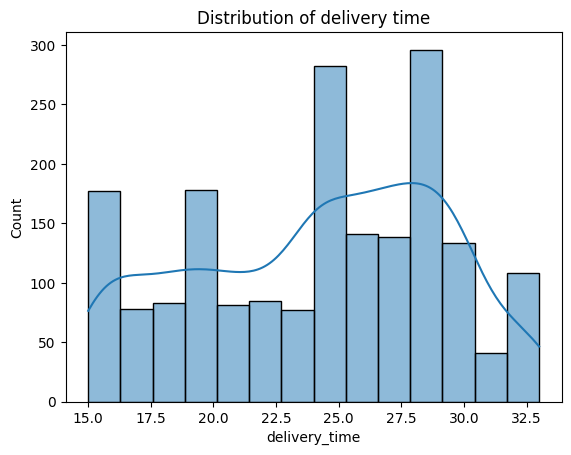

In [98]:
#histplot of delivery time
sns.histplot(data=df, x='delivery_time', kde=True);
plt.title('Distribution of delivery time');
plt.savefig("output.jpg", bbox_inches='tight');

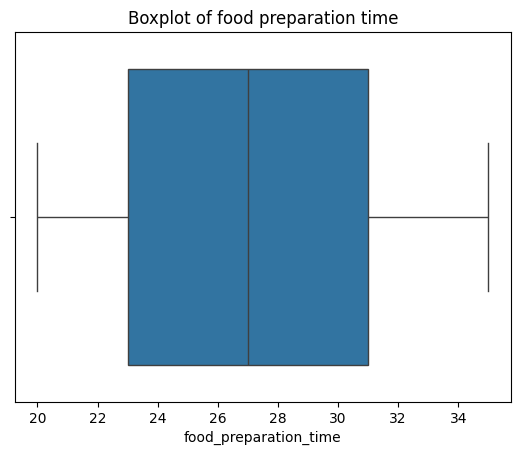

In [99]:
#boxplot food preparation time
sns.boxplot(data=df, x='food_preparation_time');
plt.title('Boxplot of food preparation time');
plt.savefig("output.jpg", bbox_inches='tight');

####Observations `On average it takes about 27 minutes to prepare most meals or orders`

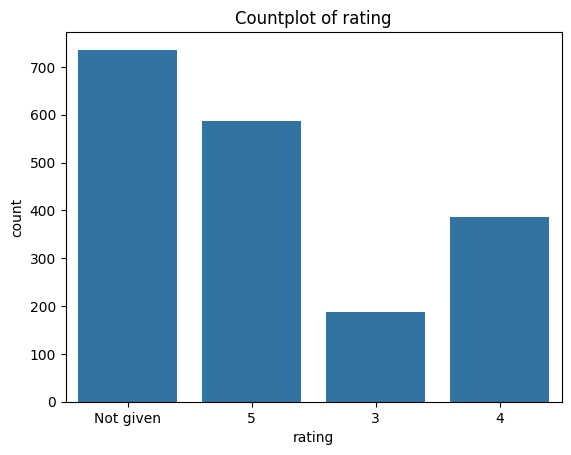

In [38]:
#countplot of rating
sns.countplot(data=df, x='rating');
plt.title('Countplot of rating');
plt.savefig("output.jpg", bbox_inches='tight');

####Observations `Most people dont give a rating but when its given five is given.`

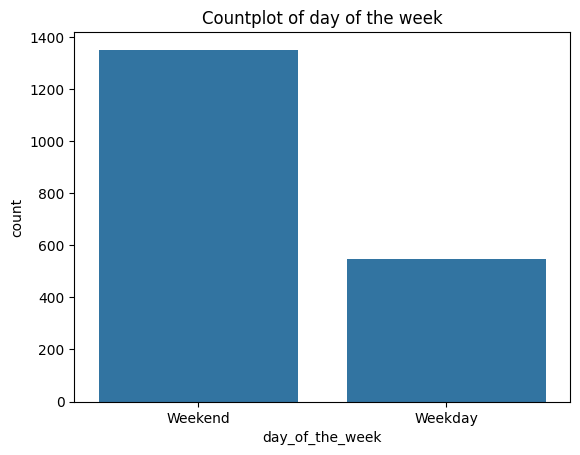

In [36]:
#countplot of day of week
sns.countplot(data=df, x='day_of_the_week');
plt.title('Countplot of day of the week');
plt.savefig("output.jpg", bbox_inches='tight');

`Most orders are during the weekend`

`Since each order is unique, order ID cant be visualised here`

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# Write the code here
df['restaurant_name'].value_counts().head()

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: `the top 5 restaurants in terms of orders received are:`
- Shake Shack               219
- The Meatball Shop         132
- Blue Ribbon Shshi         119
- Blue Ribbon Fried Chicken 96
- Parm                      68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [39]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

,cuisine_type
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15
French,13


#### Observations: `The most popular cuisine on the weekend is American cuisine with 415 orders`


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [40]:
# Write the code here
cost_order_above20 = df[df['cost_of_the_order'] > 20]
cost_order_above20.shape[0]/df.shape[0]*100

29.24130663856691

#### Observations: `29.24% of orders cost more than 20 dollars`


### **Question 10**: What is the mean order delivery time? [1 mark]

In [44]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:`The mean order delivery time is 24.16 minutes`


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [45]:
# Write the code here
df['customer_id'].value_counts().head(3)

,customer_id
52832,13
47440,10
83287,9


#### Observations: `The top 3 most frequent customers are;`
1. 52832 with 13 orders
2. 47440 with 10 orders
3. 83287 with 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


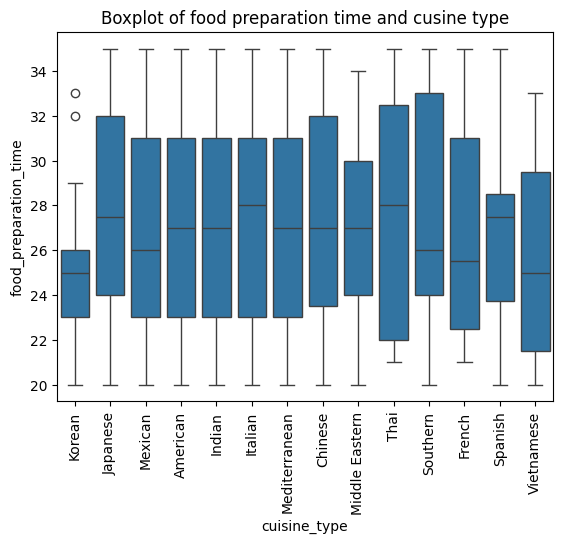

In [52]:
# Write the code here
#boxplot of food preparation time and cusine type
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time');
plt.title('Boxplot of food preparation time and cusine type');
plt.xticks(rotation=90);
plt.savefig("output.jpg", bbox_inches='tight');

###Observations `while most cuisines seem to have similar minimum preparation times, Korean seems to have the least preparation time out of them all. this is is because 75% of the orders fall below 26 minutes to prepare. this is followed by Spannish. Italian and Thai take longer to prepare on average with over 50% of them taking more than 28 minutes to prepare.`

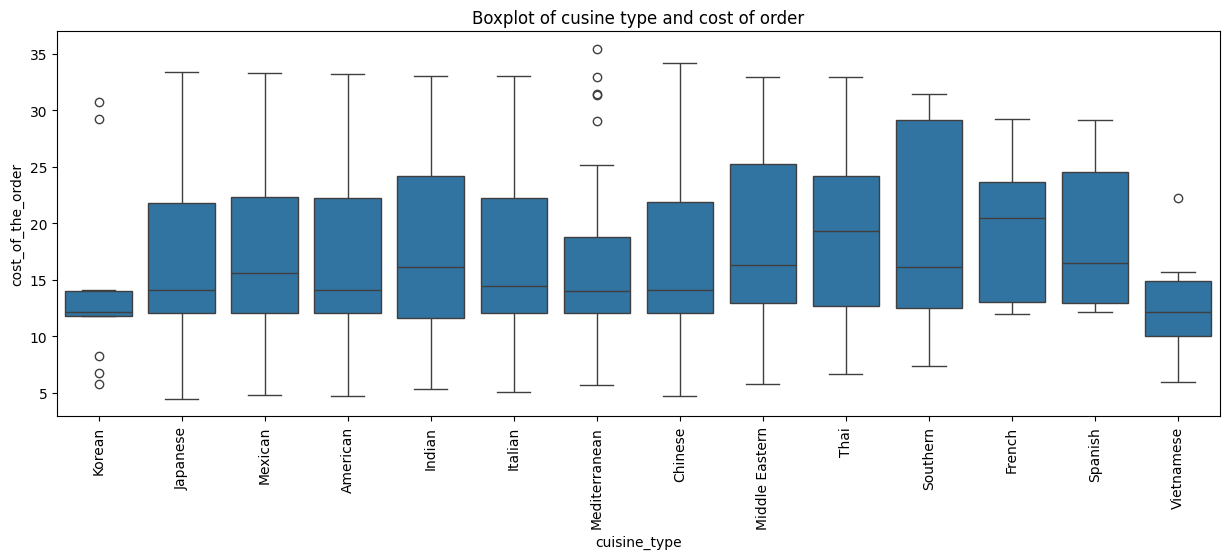

In [67]:
#cusine type and cost of order
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order');
plt.title('Boxplot of cusine type and cost of order');
plt.xticks(rotation=90);

###Observations `Korean and vietenese cuisine are the cheapest cusines on average`

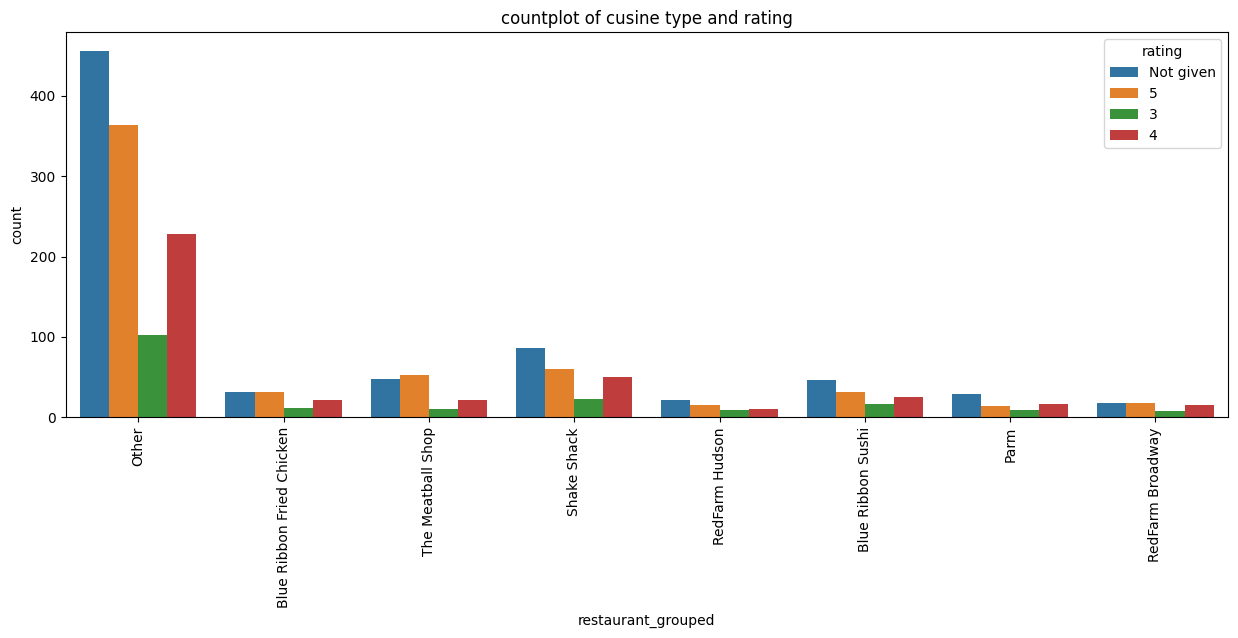

In [91]:
#rating and cuisine type
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='restaurant_grouped', hue='rating');
plt.title('countplot of cusine type and rating');
plt.xticks(rotation=90);

###Observations `The meatball shop and The shake shack seem to have the highest rating of 5 amongest the top restaurants.`

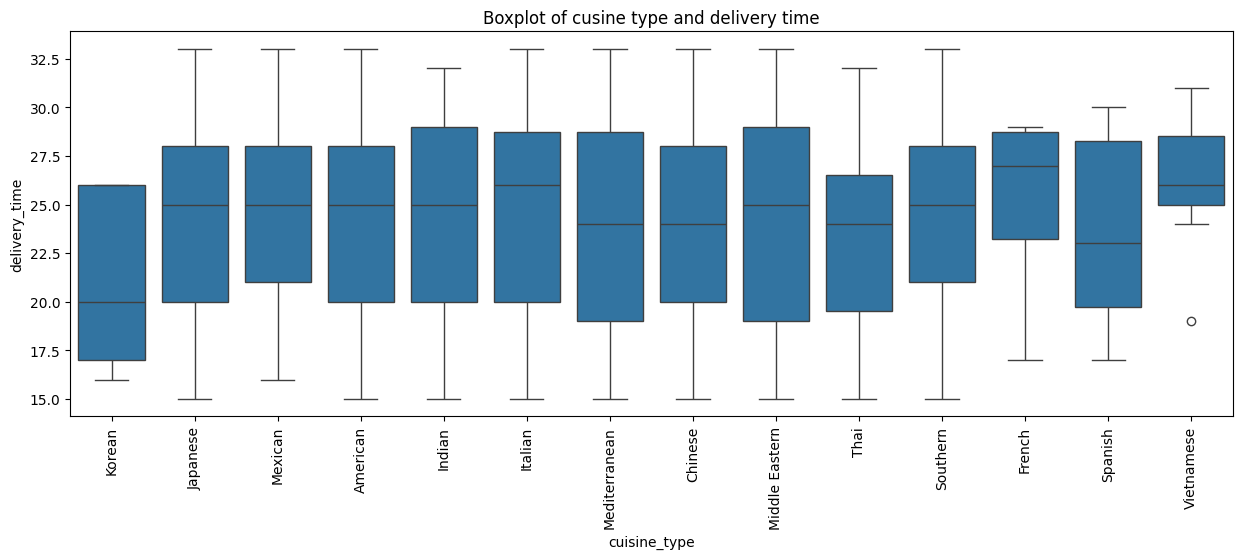

In [92]:
#cuisine type and delivery time
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time');
plt.title('Boxplot of cusine type and delivery time');
plt.xticks(rotation=90);

###observations `suprisingly it seems Vietnamese food takes longer times to deliver which could be an indications that the restaurants that do it maybe far.`

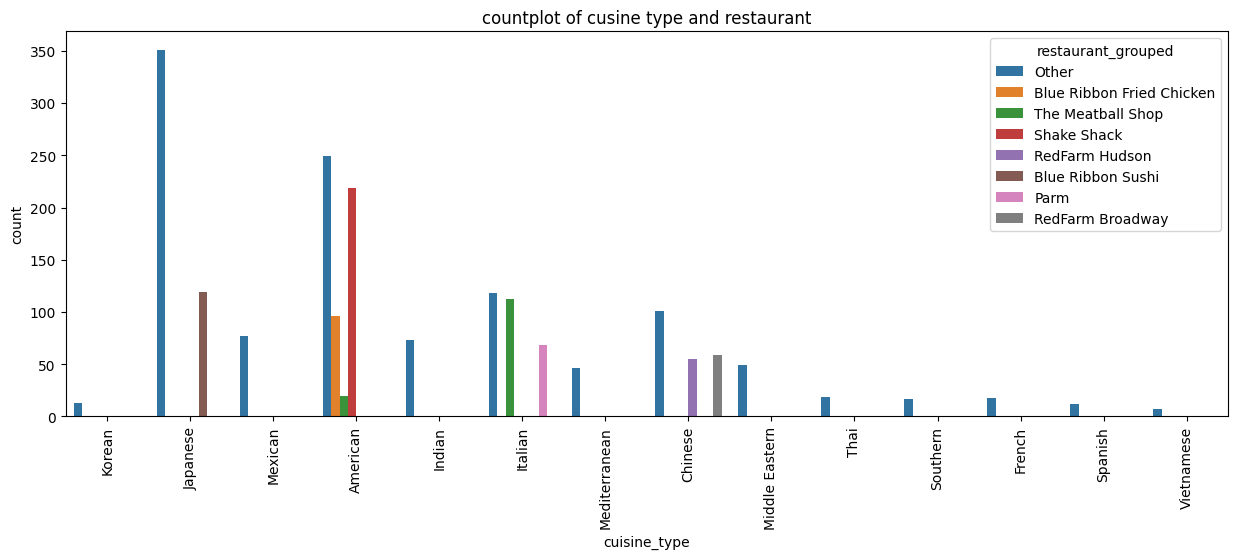

In [93]:
#cusine type and restaurants
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='cuisine_type', hue='restaurant_grouped');
plt.title('countplot of cusine type and restaurant');
plt.xticks(rotation=90);

###Observations `The meatball shop seems to be doing well in both Italian and American cuisine. The top Japanese restaurant is Blue ribon sushi,. the shake shack is the top restaurant in American cuisine. The meatball shop in Italian while the Redfarm broadway is the top in Chinese cuisine.`

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [104]:
# Write the code here
df['rating'].value_counts()

,rating
Not given,736
5,588
4,386
3,188


In [108]:
df2 = df.copy()
df2['rating'] = df2['rating'].replace('Not given', 0)

In [110]:
df2['rating'] = df2['rating'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   restaurant_grouped     1898 non-null   object 
 10  customer_grouped       1898 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 163.2+ KB


In [123]:
#droping rows with rating of 0
df2 = df2[df2['rating'] != 0]
df2['rating'].value_counts()

,rating
5.0,588
4.0,386
3.0,188


In [124]:
rating_df = df2.groupby('restaurant_name').agg({'rating': ['mean', 'count']})
rating_df.loc[(rating_df['rating']['mean'] > 4) & (rating_df['rating']['count'] > 50)]

rating      
                               mean count
restaurant_name                          
Blue Ribbon Fried Chicken  4.328125    64
Blue Ribbon Sushi          4.219178    73
Shake Shack                4.278195   133
The Meatball Shop          4.511905    84

#### Observations: `There are four restaurants that meet the criteria and qualify for the promotion.`
1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack
4. The Meatball Shop




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [130]:
# Write the code here
cost_above_20 = df[df['cost_of_the_order']>20]['cost_of_the_order']*0.25
cost_above_20.sum()

3688.7275

In [131]:
#cost above between 5 and 20
cost_above_5 = df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)]['cost_of_the_order']*0.15
cost_above_5.sum()

2477.5755

In [132]:
#total revenue
cost_above_20.sum() + cost_above_5.sum()

6166.303

#### Observations: `The total revenue from orders is 6166.303`


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [133]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df[df['total_time'] > 60].shape[0]/df.shape[0]*100

10.537407797681771

#### Observations: `10.5% of orders take more than 60 minutes to get delivered`


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [134]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: `The mean delivery time is higher for weekdays at 28 minutes than for weekends at 22 minutes.`


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*   There're not that many repeat customers.
*   American and Japanese cuisine are very popular with clients.
*   Most orders come in over the weekend.
*   Most Revenue is made on orders with a price of over 20 dollars.

### Recommendations:

*  The company should endevaour to improve on delivery times during weekdays. This can be done by looking for alternative routes with little traffic or by changing delivery means.
*  The company should start offering discounts on the best performing cuisines during the weekdays when sales are few.

---